In [301]:
import pandas as pd

In [302]:
overdoses = pd.read_csv('VSRR_Provisional_Drug_Overdose_Death_Counts.csv')
insurance_poverty = pd.read_excel('poverty_insurance.xlsx')

In [354]:
overdoses.sample(10)

,year,month,period,indicator,data_value,state,deaths,overdose_deaths
6029,2015,March,12 month-ending,Number of Deaths,36300,Colorado,36300.0,NaN
45588,2018,August,12 month-ending,Number of Deaths,8073,South Dakota,8073.0,NaN
48386,2021,April,12 month-ending,Number of Deaths,274841,Texas,274841.0,NaN
47711,2016,February,12 month-ending,Number of Drug Overdose Deaths,2645,Texas,NaN,2645.0
53670,2016,July,12 month-ending,Number of Deaths,54657,Washington,54657.0,NaN
45467,2017,December,12 month-ending,Number of Deaths,8140,South Dakota,8140.0,NaN
3362,2021,October,12 month-ending,Number of Deaths,41142,Arkansas,41142.0,NaN
2635,2016,November,12 month-ending,Number of Drug Overdose Deaths,378,Arkansas,NaN,378.0
55863,2015,December,12 month-ending,Number of Deaths,22173,West Virginia,22173.0,NaN
34435,2016,September,12 month-ending,Number of Deaths,70684,New Jersey,70684.0,NaN


In [304]:
overdoses['Data Value'] = overdoses['Data Value'].str.replace(',', '')

In [305]:
overdoses.columns = overdoses.columns.str.lower().str.replace(' ', '_')

In [306]:
overdoses.indicator.value_counts()

Percent with drugs specified                                                   5247
Number of Deaths                                                               5247
Number of Drug Overdose Deaths                                                 5247
Heroin (T40.1)                                                                 4851
Psychostimulants with abuse potential (T43.6)                                  4851
Opioids (T40.0-T40.4,T40.6)                                                    4851
Natural & semi-synthetic opioids (T40.2)                                       4851
Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)               4851
Methadone (T40.3)                                                              4851
Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)    4851
Synthetic opioids, excl. methadone (T40.4)                                     4851
Cocaine (T40.5)                                                             

In [307]:
overdoses.dtypes

state                             object
year                               int64
month                             object
period                            object
indicator                         object
data_value                        object
percent_complete                 float64
percent_pending_investigation    float64
state_name                        object
footnote                          object
footnote_symbol                   object
predicted_value                   object
dtype: object

In [308]:
overdoses = overdoses[(overdoses['indicator'] == 'Number of Deaths') | (overdoses['indicator'] == 'Number of Drug Overdose Deaths')]

In [309]:
overdoses['data_value'] = overdoses['data_value'].astype(int)

In [310]:
overdoses.head()

,state,year,month,period,indicator,data_value,percent_complete,percent_pending_investigation,state_name,footnote,footnote_symbol,predicted_value
9,AK,2015,April,12 month-ending,Number of Deaths,4133,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
11,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,126
12,AK,2015,August,12 month-ending,Number of Deaths,4222,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
19,AK,2015,August,12 month-ending,Number of Drug Overdose Deaths,124,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,124
25,AK,2015,December,12 month-ending,Number of Drug Overdose Deaths,121,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,121


In [311]:
overdoses.drop(columns=['state'], inplace=True)

In [312]:
overdoses.rename(columns={'state_name': 'state'}, inplace=True)

In [313]:
deaths_values = []
overdose_deaths_values = []

for index, row in overdoses.iterrows():
    if row['indicator'] == 'Number of Deaths':
        deaths_values.append(row['data_value'])
        overdose_deaths_values.append(None)
    elif row['indicator'] == 'Number of Drug Overdose Deaths':
        overdose_deaths_values.append(row['data_value'])
        deaths_values.append(None)
    else:
        overdose_deaths_values.append(None)
        deaths_values.append(None)

overdoses['deaths'] = deaths_values
overdoses['overdose_deaths'] = overdose_deaths_values

In [314]:
overdoses.sample(10)

,year,month,period,indicator,data_value,percent_complete,percent_pending_investigation,state,footnote,footnote_symbol,predicted_value,deaths,overdose_deaths
32889,2021,August,12 month-ending,Number of Deaths,19709,100.0,0.055812,Nebraska,Numbers may differ from published reports usin...,**,NaN,19709.0,NaN
59164,2021,March,12 month-ending,Number of Drug Overdose Deaths,2312,100.0,0.081871,New York City,Numbers may differ from published reports usin...,**,"2,325",NaN,2312.0
52900,2019,January,12 month-ending,Number of Drug Overdose Deaths,147,100.0,0.000000,Vermont,Numbers may differ from published reports usin...,**,147,NaN,147.0
32398,2015,May,12 month-ending,Number of Drug Overdose Deaths,67,100.0,0.273578,North Dakota,Numbers may differ from published reports usin...,**,69,NaN,67.0
32541,2019,May,12 month-ending,Number of Deaths,7126,100.0,0.098232,North Dakota,Numbers may differ from published reports usin...,**,NaN,7126.0,NaN
5773,2022,August,12 month-ending,Number of Deaths,320304,100.0,0.418977,California,NaN,NaN,NaN,320304.0,NaN
33664,2019,October,12 month-ending,Number of Deaths,12331,100.0,0.032439,New Hampshire,Numbers may differ from published reports usin...,**,NaN,12331.0,NaN
43360,2019,August,12 month-ending,Number of Drug Overdose Deaths,341,100.0,0.018932,Rhode Island,Numbers may differ from published reports usin...,**,341,NaN,341.0
13186,2015,November,12 month-ending,Number of Deaths,11203,100.0,0.017852,Hawaii,Numbers may differ from published reports usin...,**,NaN,11203.0,NaN
19598,2019,August,12 month-ending,Number of Deaths,26473,100.0,0.007555,Kansas,Numbers may differ from published reports usin...,**,NaN,26473.0,NaN


In [315]:
overdoses.columns = overdoses.columns.str.lower().str.replace(' ', '_')

In [316]:
insurance_poverty.drop(columns=['homeless.1', 'Regular high school diploma', 'GED or alternative credential', 'Some college, but less than 1 year', '1 or more years of college credit, no degree', "Associate's degree", "Bachelor's degree", "Master's degree", "Professional degree beyond a bachelor's degree", 'Doctorate degree'], inplace=True)

In [317]:
overdoses.drop(columns=['footnote', 'footnote_symbol', 'predicted_value', 'percent_complete', 'percent_pending_investigation'], inplace=True)

In [318]:
combined_overdoses = overdoses.groupby(['state', 'year'], as_index=False)[['deaths', 'overdose_deaths']].sum()

In [319]:
combined_overdoses.head()

,state,year,deaths,overdose_deaths
0,Alabama,2015,607641.0,8818.0
1,Alabama,2016,608611.0,8324.0
2,Alabama,2017,623769.0,9551.0
3,Alabama,2018,639981.0,9198.0
4,Alabama,2019,634030.0,8643.0


In [320]:
merged_df = pd.merge(combined_overdoses, insurance_poverty, on=['state', 'year'], how='inner')

In [321]:
merged_df.sample(10)

,state,year,deaths,overdose_deaths,poverty,uninsured,homeless,population,high_school,associates,bachelors,masters,doctorate,cannabis_legal,cannabis_medical,cannabis_decrim,gdp_m,gdp_k_per_capita
13,Alaska,2022,72494.0,2993.0,0.110,0.105060,0.003163,733583,0.415626,0.072100,0.136633,0.070731,0.008787,1,0,0,49633.7,67.659283
77,Idaho,2015,153781.0,2570.0,0.151,0.116581,0.001188,1654930,0.426941,0.068939,0.128112,0.048708,0.008710,0,0,0,63081.2,38.117141
171,Missouri,2018,784465.0,18111.0,0.132,0.096465,0.000960,6126452,0.417340,0.063969,0.146188,0.076986,0.008906,0,1,0,284540.3,46.444549
214,New Mexico,2019,223615.0,6716.0,0.182,0.101507,0.001546,2096829,0.398043,0.065980,0.117465,0.082572,0.016268,0,1,1,94897.4,45.257577
252,Oregon,2015,422629.0,6129.0,0.154,0.071460,0.003283,4028977,0.416115,0.065963,0.149512,0.078090,0.012433,1,0,0,189946.5,47.145094
147,Michigan,2015,1134047.0,23417.0,0.158,0.062975,0.001060,9922576,0.434303,0.067731,0.125322,0.067718,0.008617,0,1,0,443831.2,44.729433
30,California,2017,3202053.0,58406.0,0.133,0.074241,0.003327,39536653,0.352755,0.059372,0.155289,0.077460,0.011264,1,0,0,2538204.0,64.198758
174,Missouri,2022,918495.0,26203.0,0.132,0.086548,0.000970,6177957,0.413345,0.064014,0.147273,0.077859,0.009696,1,0,0,300676.3,48.669212
323,Washington,2016,656102.0,13830.0,0.113,0.060250,0.002858,7288000,0.380615,0.077706,0.165292,0.084026,0.010393,1,0,0,458263.8,62.879226
61,Florida,2021,3085848.0,94483.0,0.131,0.125570,0.000970,21781128,0.392850,0.083474,0.167156,0.085875,0.010803,0,1,0,1029575.6,47.269159


In [322]:
merged_df['overdose_percent'] = merged_df['overdose_deaths'] / merged_df['deaths'] * 100

In [290]:
merged_df['homeless'] = merged_df['homeless'] * 100

In [323]:
merged_df.sample(10)

,state,year,deaths,overdose_deaths,poverty,uninsured,homeless,population,high_school,associates,bachelors,masters,doctorate,cannabis_legal,cannabis_medical,cannabis_decrim,gdp_m,gdp_k_per_capita,overdose_percent
70,Hawaii,2015,133348.0,1884.0,0.106,0.038583,0.005323,1431603,0.407600,0.078269,0.161921,0.066542,0.010731,0,1,1,75869.5,52.996187,1.412845
324,Washington,2017,676325.0,13223.0,0.110,0.061279,0.002851,7405743,0.375526,0.079626,0.169690,0.087293,0.011740,1,0,0,482007.0,65.085569,1.955125
151,Michigan,2019,1159434.0,28803.0,0.130,0.059559,0.000859,9986857,0.418493,0.073568,0.145069,0.077978,0.008833,1,0,0,467107.0,46.772173,2.484229
290,Tennessee,2018,896800.0,21758.0,0.153,0.105552,0.001164,6770010,0.433382,0.059521,0.147068,0.070973,0.010831,0,0,0,323541.6,47.790417,2.426182
212,New Mexico,2017,214756.0,6036.0,0.197,0.094691,0.001189,2088070,0.409779,0.057294,0.112657,0.066698,0.012657,0,1,0,88962.9,42.605325,2.810632
85,Illinois,2016,1240690.0,26227.0,0.130,0.066297,0.000905,12801539,0.382412,0.060174,0.153442,0.082931,0.009350,0,1,1,749333.5,58.534642,2.113904
77,Idaho,2015,153781.0,2570.0,0.151,0.116581,0.001188,1654930,0.426941,0.068939,0.128112,0.048708,0.008710,0,0,0,63081.2,38.117141,1.671208
86,Illinois,2017,1268097.0,31024.0,0.126,0.069668,0.000843,12802023,0.377529,0.060129,0.156311,0.086764,0.009712,0,1,1,753027.0,58.820938,2.446501
65,Georgia,2017,995416.0,17723.0,0.149,0.139444,0.000976,10429379,0.388356,0.058801,0.139941,0.074801,0.009576,0,0,0,523805.3,50.224016,1.780462
124,Louisiana,2021,694922.0,27635.0,0.196,0.082523,0.000461,4624047,0.426030,0.051760,0.120329,0.060845,0.008035,0,1,1,221152.7,47.826655,3.976705


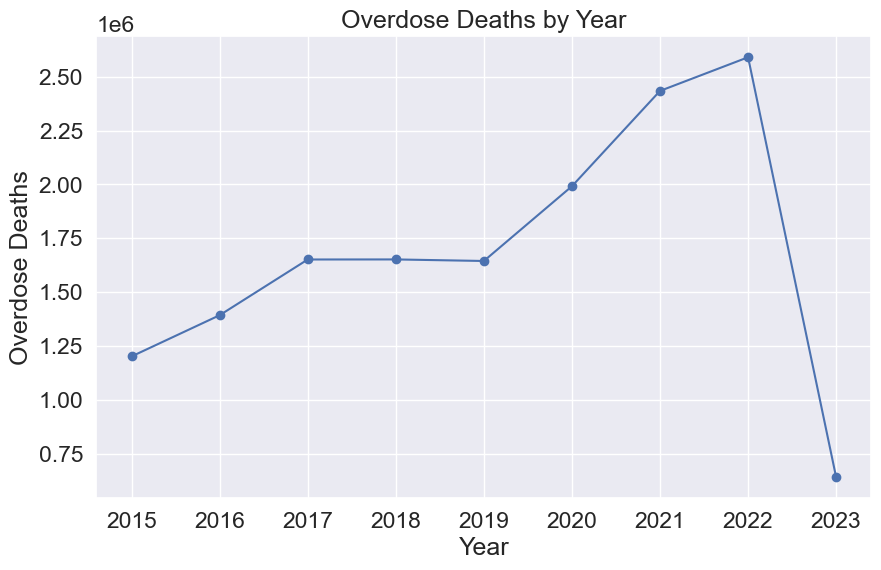

In [293]:
import matplotlib.pyplot as plt

sum_by_year = combined_overdoses.groupby('year')['overdose_deaths'].sum()

plt.figure(figsize=(10, 6))
plt.plot(sum_by_year.index, sum_by_year.values, marker='o', linestyle='-')
plt.title('Overdose Deaths by Year')
plt.xlabel('Year')
plt.ylabel('Overdose Deaths')
plt.grid(True)
plt.show()

In [260]:
num_df = round(merged_df.corr(), 2)

C:\Users\chris\AppData\Local\Temp\ipykernel_29632\4234268521.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  num_df = round(merged_df.corr(), 2)


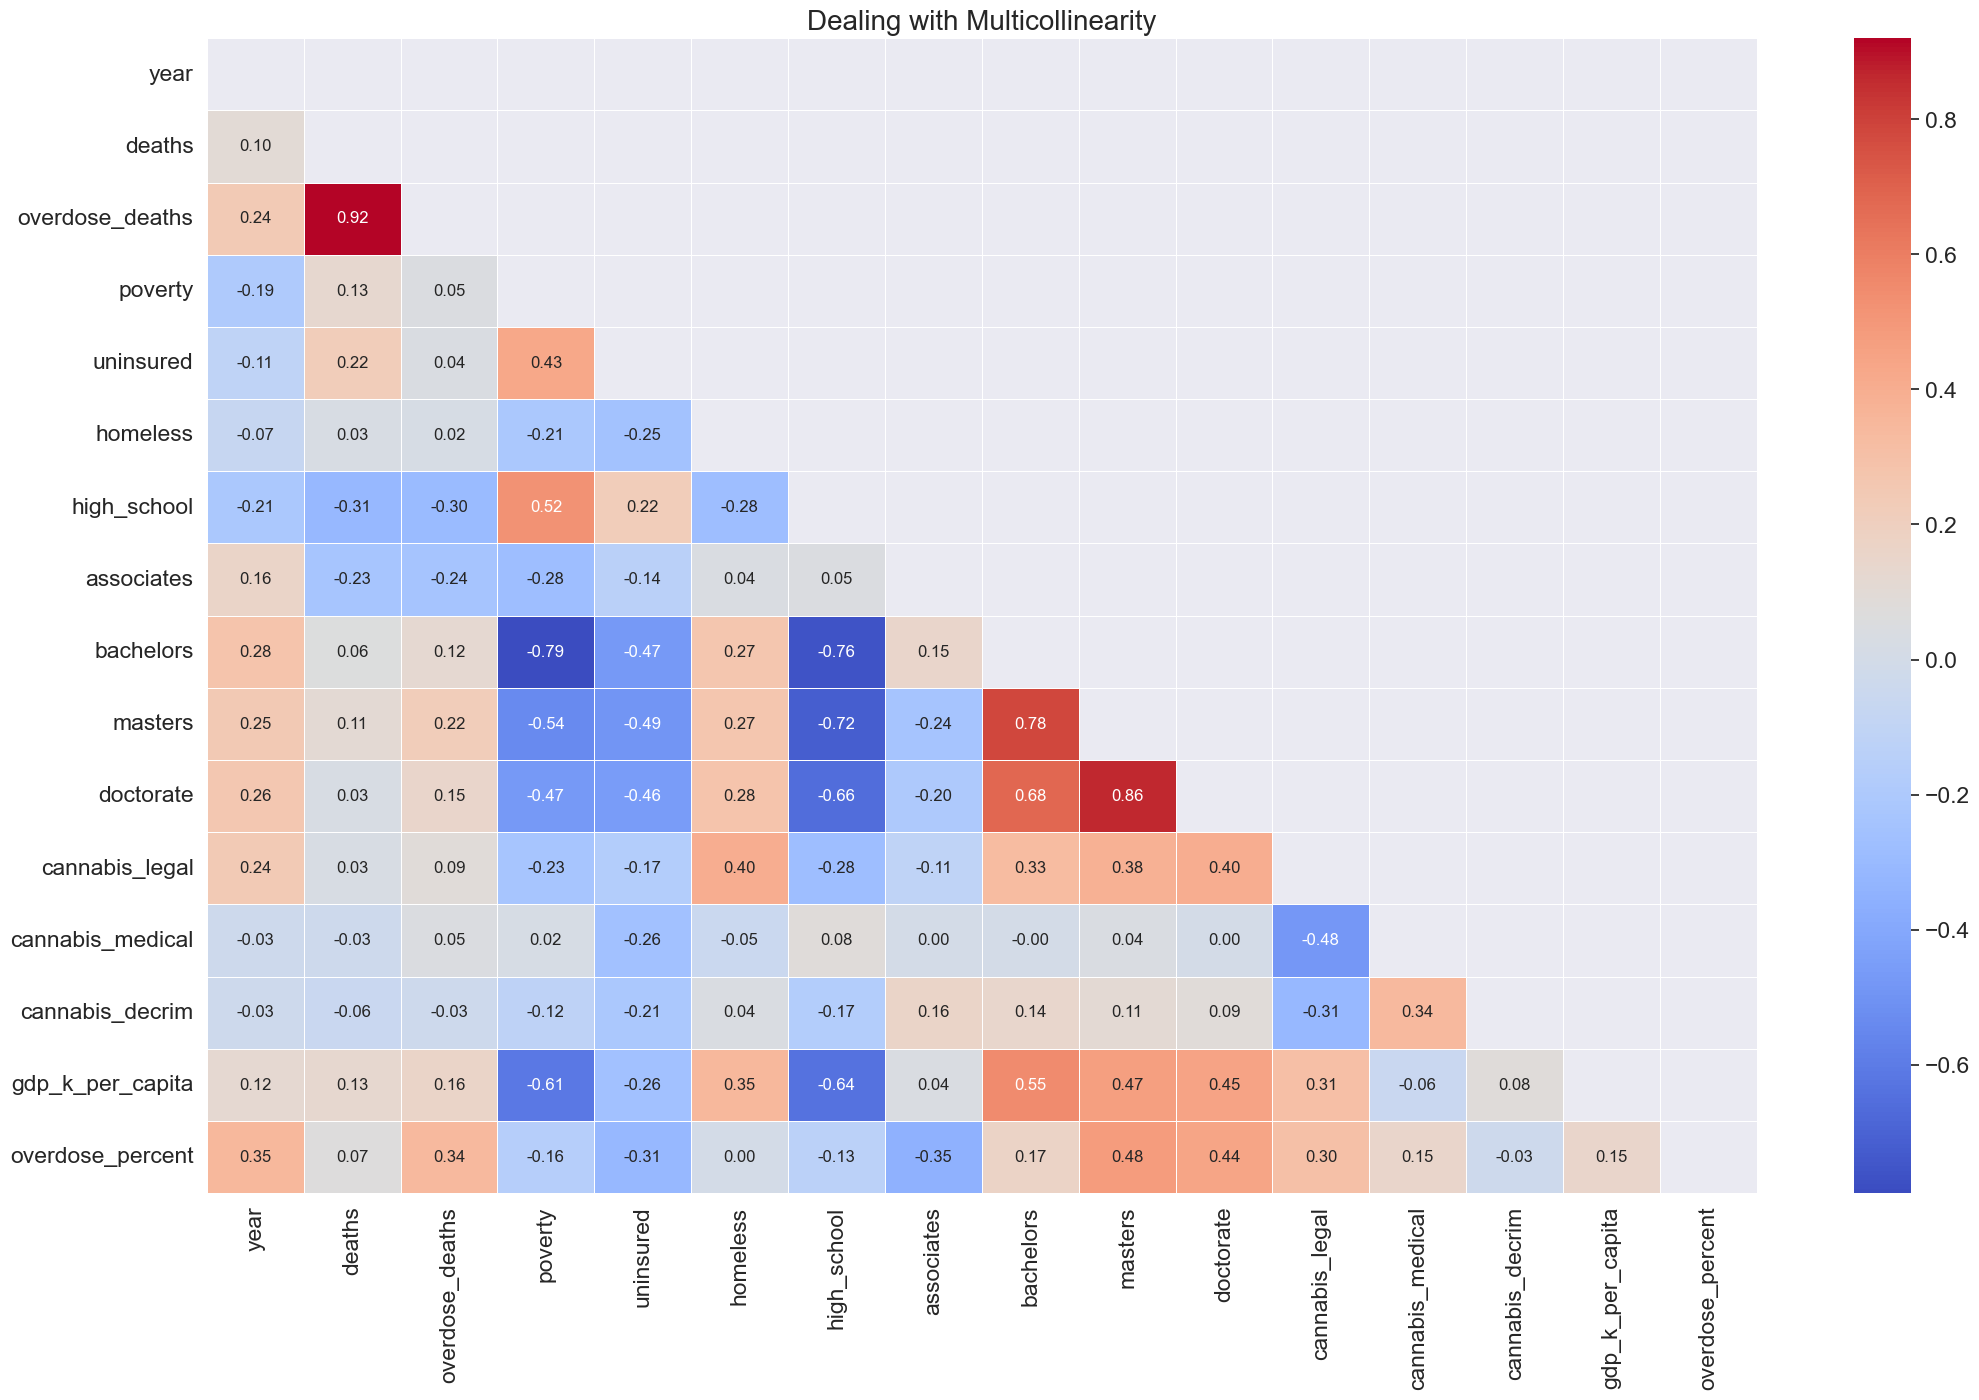

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_df)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(num_df, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [256]:
merged_df.drop(columns=['population'], inplace=True)

In [257]:
merged_df.drop(columns=['gdp_m'], inplace=True)

In [262]:
merged_df.drop(columns=['deaths', 'overdose_deaths'], inplace=True)

In [349]:
merged_df.head()

,state,year,deaths,overdose_deaths,poverty,uninsured,homeless,population,high_school,associates,bachelors,masters,doctorate,cannabis_legal,cannabis_medical,cannabis_decrim,gdp_m,gdp_k_per_capita,overdose_percent
0,Alabama,2015,607641.0,8818.0,0.185,0.107364,0.000817,4858979,0.422846,0.061332,0.111019,0.057238,0.007059,0,0,0,191335.2,39.377655,1.451186
1,Alabama,2016,608611.0,8324.0,0.171,0.097126,0.000845,4863300,0.428231,0.060597,0.114778,0.058426,0.007664,0,0,0,194283.8,39.948965,1.367704
2,Alabama,2017,623769.0,9551.0,0.169,0.099939,0.000778,4874747,0.429467,0.066013,0.114922,0.058148,0.007593,0,0,0,196974.9,40.407205,1.531176
3,Alabama,2018,639981.0,9198.0,0.168,0.106581,0.000703,4887871,0.435256,0.067297,0.127510,0.067277,0.009019,0,0,0,200372.6,40.993840,1.437230
4,Alabama,2019,634030.0,8643.0,0.155,0.100982,0.000665,4903185,0.433896,0.067087,0.127112,0.067067,0.008990,0,0,0,203432.7,41.489909,1.363185


In [263]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = merged_df.drop(columns='overdose_percent')
y = merged_df['overdose_percent']

X['state'] = X['state'].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = XGBRegressor(tree_method="hist", enable_categorical=True)

model = regressor.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.08627025383143357


In [264]:
result = model.fit(X, y)
result.score(X, y)

0.9999990821361434

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = merged_df.drop(columns='overdose_percent')
y = merged_df['overdose_percent']

X['state'] = X['state'].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = XGBRegressor(tree_method="hist", enable_categorical=True)

model = regressor.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


In [265]:
predictions = model.predict(X)

In [266]:
import pandas as pd

predictions_df = pd.DataFrame({'Predicted': predictions})

predictions_df = pd.concat([X.reset_index(drop=True), predictions_df], axis=1)

predictions_df.head()

,state,year,poverty,uninsured,homeless,high_school,associates,bachelors,masters,doctorate,cannabis_legal,cannabis_medical,cannabis_decrim,gdp_k_per_capita,Predicted
0,Alabama,2015,0.185,0.107364,0.081704,0.422846,0.061332,0.111019,0.057238,0.007059,0,0,0,39.377655,1.451388
1,Alabama,2016,0.171,0.097126,0.084531,0.428231,0.060597,0.114778,0.058426,0.007664,0,0,0,39.948965,1.368912
2,Alabama,2017,0.169,0.099939,0.077809,0.429467,0.066013,0.114922,0.058148,0.007593,0,0,0,40.407205,1.530464
3,Alabama,2018,0.168,0.106581,0.070256,0.435256,0.067297,0.127510,0.067277,0.009019,0,0,0,40.993840,1.436797
4,Alabama,2019,0.155,0.100982,0.066508,0.433896,0.067087,0.127112,0.067067,0.008990,0,0,0,41.489909,1.363892


In [296]:
overdoses.head()

,year,month,period,indicator,data_value,state,deaths,overdose_deaths,date
9,2015,4,12 month-ending,Number of Deaths,4133,Alaska,4133.0,NaN,2015-04-01
11,2015,4,12 month-ending,Number of Drug Overdose Deaths,126,Alaska,NaN,126.0,2015-04-01
12,2015,8,12 month-ending,Number of Deaths,4222,Alaska,4222.0,NaN,2015-08-01
19,2015,8,12 month-ending,Number of Drug Overdose Deaths,124,Alaska,NaN,124.0,2015-08-01
25,2015,12,12 month-ending,Number of Drug Overdose Deaths,121,Alaska,NaN,121.0,2015-12-01


In [295]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

overdoses['month'] = overdoses['month'].map(month_dict)

overdoses['date'] = overdoses.apply(lambda x: datetime(x['year'], x['month'], 1), axis=1)

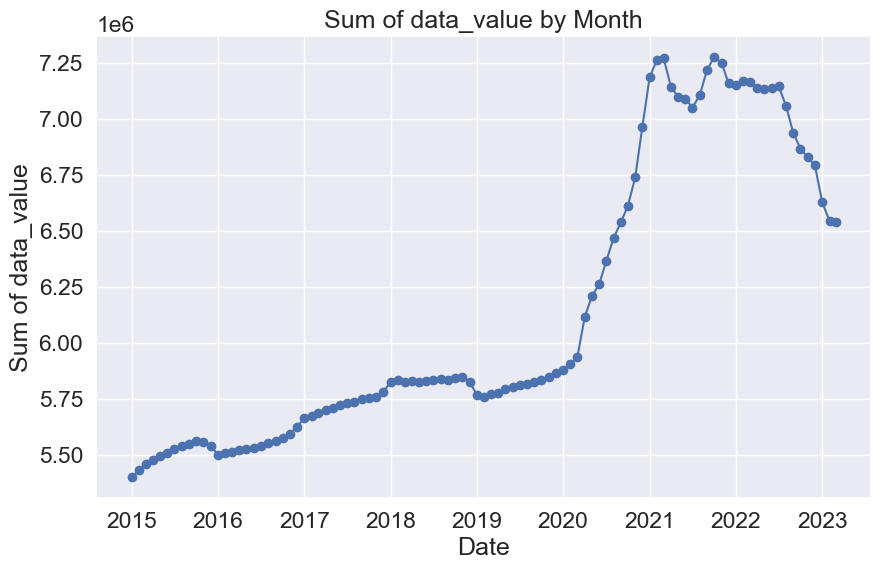

In [297]:
sum_by_month = overdoses.groupby('date')['data_value'].sum()

plt.figure(figsize=(10, 6))
plt.plot(sum_by_month.index, sum_by_month.values, marker='o', linestyle='-')
plt.title('Sum of data_value by Month')
plt.xlabel('Date')
plt.ylabel('Sum of data_value')
plt.grid(True)
plt.show()


In [346]:
import scipy.stats as stats

test_data = merged_df['doctorate']
overdose_data = merged_df['overdose_percent']

correlation_coefficient, p_value = stats.pearsonr(test_data, overdose_data)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

alpha = 0.005
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant correlation.')
else:
    print('Fail to reject the null hypothesis: There is no significant correlation.')


Pearson Correlation Coefficient: 0.4405142569079175
P-value: 4.777651964217534e-18
Reject the null hypothesis: There is a significant correlation.


In [348]:
import scipy.stats as stats

test_data = merged_df['cannabis_decrim']
overdose_data = merged_df['overdose_percent']

correlation_coefficient, p_value = stats.pearsonr(test_data, overdose_data)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

alpha = 0.005
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant correlation.')
else:
    print('Fail to reject the null hypothesis: There is no significant correlation.')


Pearson Correlation Coefficient: -0.030466896466201317
P-value: 0.5699831423205315
Fail to reject the null hypothesis: There is no significant correlation.


In [337]:
import scipy.stats as stats

test_data = merged_df['uninsured']
overdose_data = merged_df['overdose_percent']

correlation_coefficient, p_value = stats.pearsonr(test_data, overdose_data)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

alpha = 0.005
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant correlation.')
else:
    print('Fail to reject the null hypothesis: There is no significant correlation.')


Pearson Correlation Coefficient: -0.30668088113535696
P-value: 4.664402377791822e-09
Reject the null hypothesis: There is a significant correlation.


In [336]:
import scipy.stats as stats

test_data = merged_df['gdp_k_per_capita']
overdose_data = merged_df['overdose_percent']

correlation_coefficient, p_value = stats.pearsonr(test_data, overdose_data)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

alpha = 0.005
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant correlation.')
else:
    print('Fail to reject the null hypothesis: There is no significant correlation.')


Pearson Correlation Coefficient: 0.14545962051051042
P-value: 0.006409169564352254
Fail to reject the null hypothesis: There is no significant correlation.


In [335]:
import scipy.stats as stats

test_data = merged_df['poverty']
overdose_data = merged_df['overdose_percent']

correlation_coefficient, p_value = stats.pearsonr(test_data, overdose_data)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

alpha = 0.005
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant correlation.')
else:
    print('Fail to reject the null hypothesis: There is no significant correlation.')


Pearson Correlation Coefficient: -0.1608189200628189
P-value: 0.0025482860380817833
Reject the null hypothesis: There is a significant correlation.


In [334]:
import scipy.stats as stats

test_data = merged_df['homeless']
overdose_data = merged_df['overdose_percent']

correlation_coefficient, p_value = stats.pearsonr(test_data, overdose_data)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

alpha = 0.005
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant correlation.')
else:
    print('Fail to reject the null hypothesis: There is no significant correlation.')


Pearson Correlation Coefficient: 0.002930683606820842
P-value: 0.9564316046857878
Fail to reject the null hypothesis: There is no significant correlation.


In [352]:
overdoses.head()

,year,month,period,indicator,data_value,state,deaths,overdose_deaths
9,2015,April,12 month-ending,Number of Deaths,4133,Alaska,4133.0,NaN
11,2015,April,12 month-ending,Number of Drug Overdose Deaths,126,Alaska,NaN,126.0
12,2015,August,12 month-ending,Number of Deaths,4222,Alaska,4222.0,NaN
19,2015,August,12 month-ending,Number of Drug Overdose Deaths,124,Alaska,NaN,124.0
25,2015,December,12 month-ending,Number of Drug Overdose Deaths,121,Alaska,NaN,121.0


In [378]:
tableau_data = overdoses

In [379]:
tableau_data.drop(columns='period', inplace=True)

In [380]:
tableau_data = tableau_data.groupby(['state', 'year', 'month'], as_index=False)[['deaths', 'overdose_deaths']].sum()

In [381]:
tableau_data['overdose_percent'] = tableau_data['overdose_deaths'] / tableau_data['deaths'] * 100

In [382]:
tableau_data = pd.merge(tableau_data, insurance_poverty, on=['state', 'year'], how='left')

In [383]:
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

tableau_data['month'] = tableau_data['month'].map(month_dict)

tableau_data['date'] = tableau_data.apply(lambda x: datetime(x['year'], x['month'], 1), axis=1)

In [387]:
tableau_data.head()

,state,year,month,deaths,overdose_deaths,overdose_percent,poverty,uninsured,homeless,population,...,associates,bachelors,masters,doctorate,cannabis_legal,cannabis_medical,cannabis_decrim,gdp_m,gdp_k_per_capita,date
0,Alabama,2015,4,50565.0,738.0,1.459508,0.185,0.107364,0.000817,4858979.0,...,0.061332,0.111019,0.057238,0.007059,0.0,0.0,0.0,191335.2,39.377655,2015-04-01
1,Alabama,2015,8,50930.0,736.0,1.445121,0.185,0.107364,0.000817,4858979.0,...,0.061332,0.111019,0.057238,0.007059,0.0,0.0,0.0,191335.2,39.377655,2015-08-01
2,Alabama,2015,12,50870.0,720.0,1.415373,0.185,0.107364,0.000817,4858979.0,...,0.061332,0.111019,0.057238,0.007059,0.0,0.0,0.0,191335.2,39.377655,2015-12-01
3,Alabama,2015,2,50004.0,723.0,1.445884,0.185,0.107364,0.000817,4858979.0,...,0.061332,0.111019,0.057238,0.007059,0.0,0.0,0.0,191335.2,39.377655,2015-02-01
4,Alabama,2015,1,49543.0,715.0,1.443191,0.185,0.107364,0.000817,4858979.0,...,0.061332,0.111019,0.057238,0.007059,0.0,0.0,0.0,191335.2,39.377655,2015-01-01


In [385]:
tableau_data.year.value_counts()

2015    636
2016    636
2017    636
2018    636
2019    636
2020    636
2021    636
2022    636
2023    159
Name: year, dtype: int64

In [386]:
tableau_data.to_csv('overdose_data_2020.csv')